In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
provider = IBMQ.load_account()

In [2]:
old_qc = QuantumCircuit
del QuantumCircuit
class QuantumCircuit(old_qc):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.qc = self
        
    def ccxx(
        self,
        control_qubit1,
        control_qubit2,
        target_qubit1,
        target_qubit2,
        ctrl_state = None
    ):
        from qiskit.circuit.library.standard_gates.x import CCXGate
        
        self.append(
            CCXGate(ctrl_state=ctrl_state),
            [control_qubit1, control_qubit2, target_qubit1],
            [],
        )
        
        self.append(
            CCXGate(ctrl_state=ctrl_state),
            [control_qubit1, control_qubit2, target_qubit2],
            [],
        )
        return None

In [3]:
sensors = QuantumRegister(2, 'sensor')  # making the sensor registers
motors = QuantumRegister(3, 'motor')  # making the motor registers
creg_c = ClassicalRegister(3, 'c')  # making the classical register for the motors
circuit = QuantumCircuit(sensors, motors, creg_c)

In [4]:
ket_0 = [1, 0]
ket_1 = [0, 1]
sensor_start = [ket_1, ket_0]
circuit.initialize(sensor_start[0], [sensors[0]])
circuit.initialize(sensor_start[1], [sensors[1]])

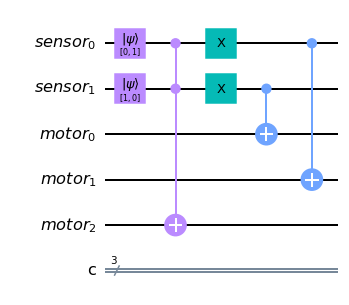

In [5]:
circuit.ccx(sensors[0], sensors[1], motors[2])
circuit.x(sensors[0])
circuit.x(sensors[1])
circuit.cx(sensors[1], motors[0])
circuit.cx(sensors[0], motors[1])
circuit.draw()

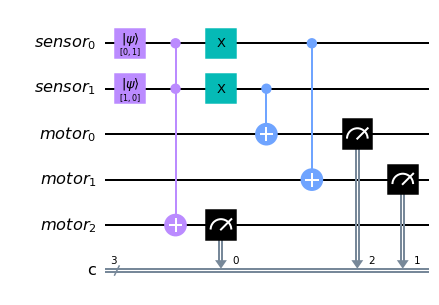

In [6]:
circuit.measure(motors[0], creg_c[2])
circuit.measure(motors[1], creg_c[1])
circuit.measure(motors[2], creg_c[0])
circuit.draw()

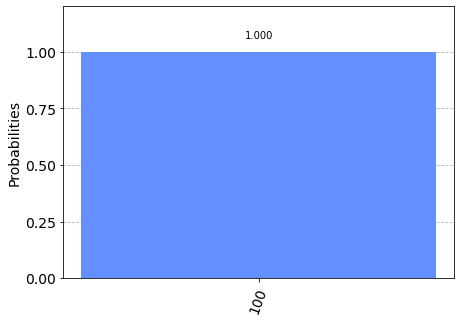

In [7]:
comp = Aer.get_backend("qasm_simulator")
results = execute(circuit, comp).result()
plot_histogram(results.get_counts(circuit))
# list(results.get_counts(circuit).keys())